# Wine Data Analysis-EDA
1. Data preparation: dividing quality score into 3 different categories, etc. 
2. Create visualizations to depict how residual sugar, density and alcohol affect the quality of the wine. 
3. Other variable observations. 
4. Faulty Wines: Characteristics that can influence wine quality negatively. 
5. Univariate and bivariate analysis. 

In [100]:
#Loading modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [145]:
#Loading Data and preview data
wine = pd.read_csv('winequality.csv', sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploring the data set

In [10]:
print("Shape of dataset: {s}".format(s = wine.shape))
print("Column headers: {s}".format(s = list(wine)))

Shape of dataset: (1599, 12)
Column headers: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


There are 1599 records and 12 feature variables, out of which quality variable is dependent variable.

In [11]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are 12 columns are of numeric data types, where quality column is of integer type

# Basic Statistics and identifying missing values

In [12]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#Observations on above output:
    - There is no missing value in any column
    - There is much difference between mean and median for free sulfur dioxide and total sulfur dioxide.
    - If we compare median value with max value for residual sugar, free sulfur dioxide, and total sulfur dioxide, if 
      clearly shows that there are outliers.

In [146]:
#renaming the headers to remove space in names
wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid','volatile acidity':'volatile_acidity','residual sugar':'residual_sugar','free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
wine.head(n=5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


To understand the quality of wine, we need to further explore the qulaity column:
Getting the unique values:   

In [14]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

There are 6 unique values ranging from 3 to 8 only.

In [15]:
#finding the frquency of each unique quality value
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

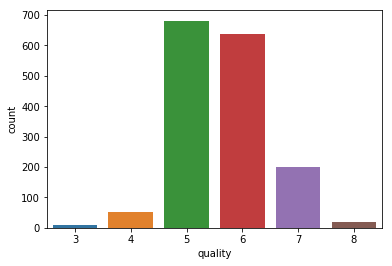

In [16]:
#visulaizing the counts of quality columns
sns.countplot(x='quality', data=wine)

#Creating category for wine based on quality values:
- Poor : 1 to 4
- Normal: 5 to 6
- Good: 7 to 10

In [147]:
conditions = [
    (wine['quality'] >= 7),
    (wine['quality'] <= 4)
]
rating = ['Good', 'Poor']
wine['rating'] = np.select(conditions, rating, default='Normal')
wine.rating.value_counts()

Normal    1319
Good       217
Poor        63
Name: rating, dtype: int64

In [21]:
wine.groupby('rating').median()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
Good,8.7,0.37,0.40,2.3,0.073,11.0,27.0,0.99572,3.27,0.74,11.6,7
Normal,7.8,0.54,0.24,2.2,0.080,14.0,40.0,0.99680,3.31,0.61,10.0,5
Poor,7.5,0.68,0.08,2.1,0.080,9.0,26.0,0.99660,3.38,0.56,10.0,4


#Observation on above output:
- Citric acid and free sulfur dioxide have higher side of difference when we compare the wines quality.
Let's create further visualization to understand the correlations between various independent and dependent variables

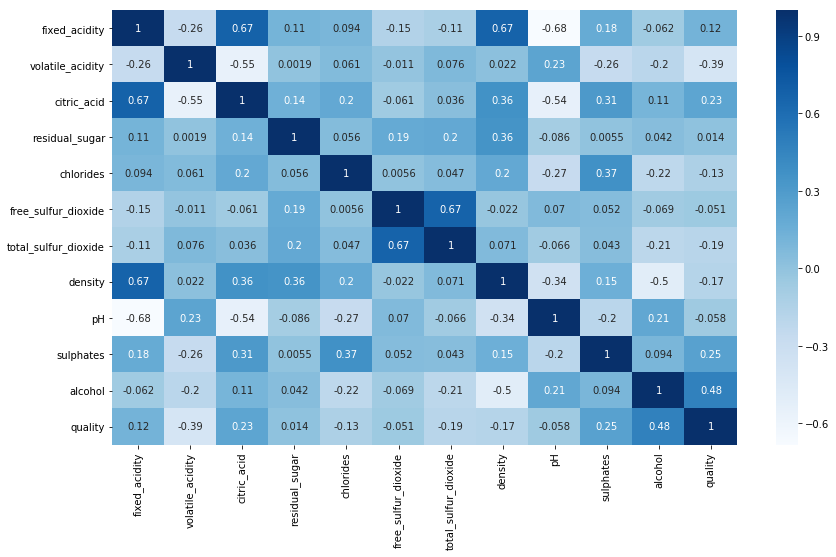

In [22]:
correlation = wine.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, cmap="Blues")

#After observing above figure, 
following are highly positively correlated independent variables with value (0.67):
- density and fixed_acidity
- total_sulfur_dioxide and free_sulfur_dioxide
- Citric_acid and fixed_acidity
So, while creating any model, we can take one of the two columns

following are correlated with quality, which helps to understand features to be considered for quality of a wine:
- alcohol - highly correlated
- volatile_acidity - least correlated

In [23]:
# further validation on above obserations:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

It means alocohol, sulphates, and citric_acid have maximum correlation with quality of wine. 
Changes in values of these may affect the quality of wine. lets validate the observations.

# Univariate Analysis

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Alcohol percent in different wine quality types')]

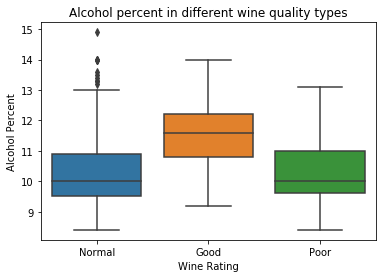

In [148]:
#comparing Alcohol with quality
bx = sns.boxplot(x="rating", y='alcohol', data = wine)
bx.set(xlabel='Wine Rating', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Sulphates in different types of Wine Quality')]

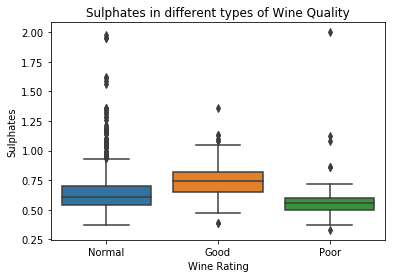

In [149]:
#comparing Sulphates with quality
bx = sns.boxplot(x="rating", y='sulphates', data = wine)
bx.set(xlabel='Wine Rating', ylabel='Sulphates', title='Sulphates in different types of Wine Quality')

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Citric acid in different types of Wine Quality')]

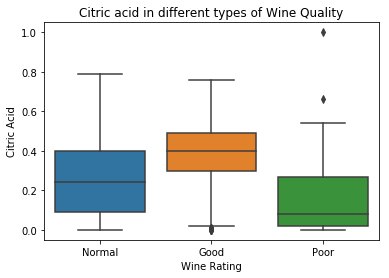

In [150]:
#comparing Citric_acid with quality
bx = sns.boxplot(x="rating", y='citric_acid', data = wine)
bx.set(xlabel='Wine Rating', ylabel='Citric Acid', title='Citric acid in different types of Wine Quality')

#Comparing all three:
- There are huge number of outliers for sulphates and alocohol where the quality index is 5.
- In case of sulphates, there are outliers in almost every quality index

# Bivariate Analysis with Other features and Ratings

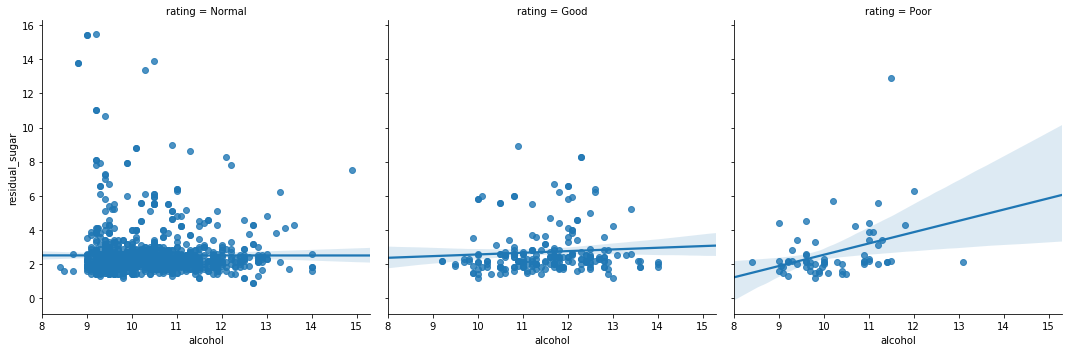

In [28]:
#Comparing alcohol and residual sugar with rating
sns.lmplot(x = "alcohol", y = "residual_sugar", col = "rating", data = wine)

#Based on above image, there are more outliers in residual sugar than alcohol.

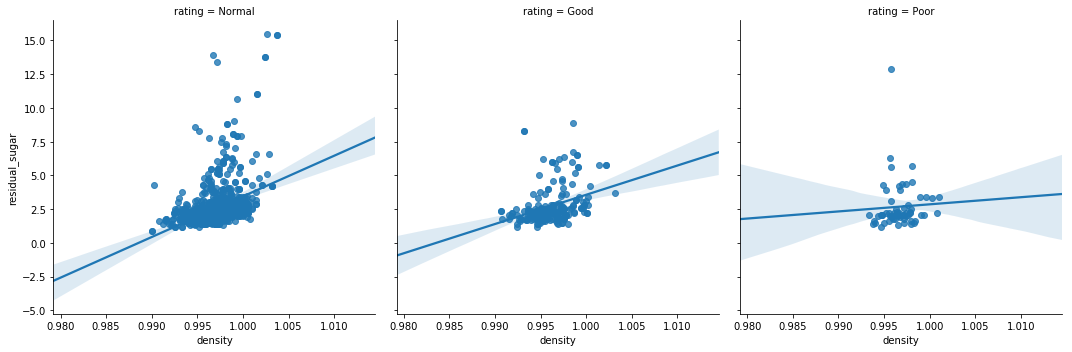

In [29]:
#Comparing density and residual sugar with rating
sns.lmplot(x = "density", y = "residual_sugar", col = "rating", data = wine)

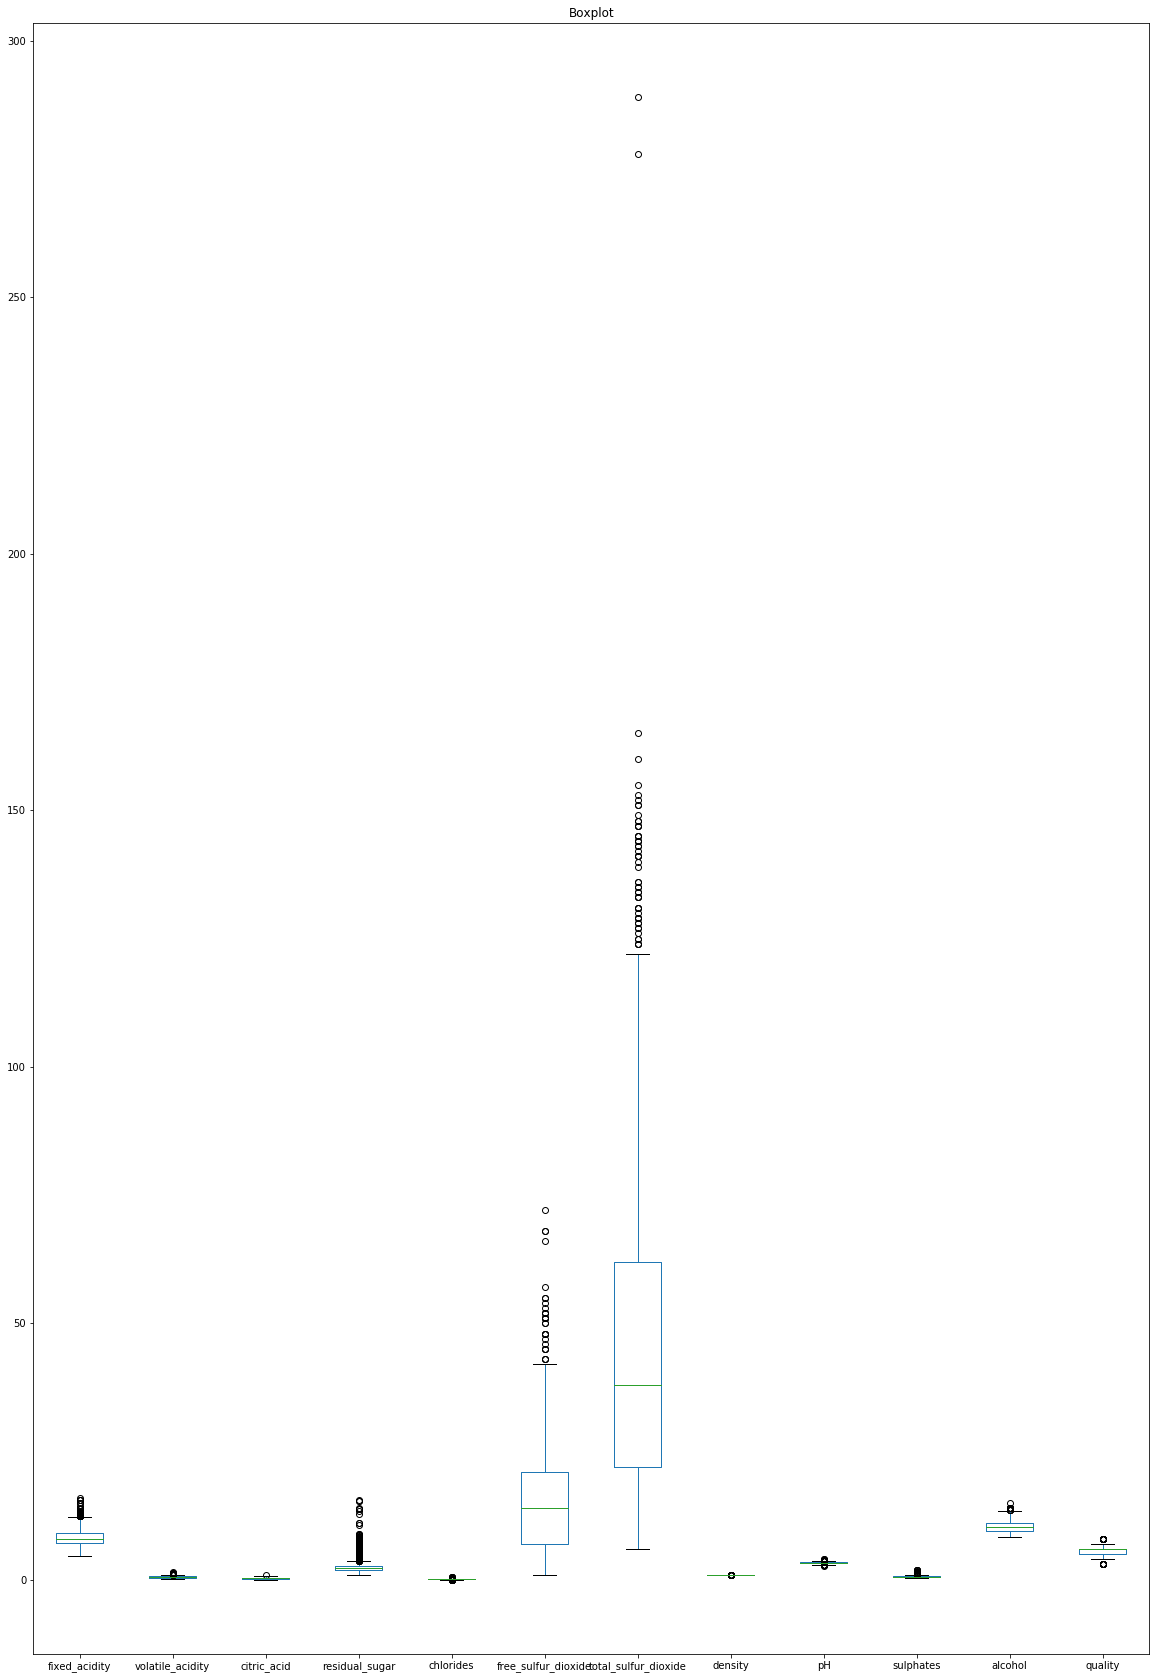

In [31]:
wine.plot(kind = 'box', figsize = (20,30), title = 'Boxplot')

# Treating the outliers

In [176]:
#Treating outlier for almost every column
for c in wine.columns:
    if c != 'rating':
        q1=wine[c].quantile(0.25)
        q3=wine[c].quantile(0.75)
        IQR = q3 - q1
        median=wine[c].median()
        wine[c]=np.where(((wine[c] < (q1 - 1.5 * IQR)) |(wine[c] > (q3 + 1.5 * IQR))),median,wine[c])

In [152]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99675,3.31,0.56,10.2,6.0,Normal
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99675,3.31,0.68,10.2,6.0,Normal
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99675,3.31,0.65,10.2,6.0,Normal
3,7.9,0.28,0.56,1.9,0.075,17.0,60.0,0.99675,3.31,0.58,10.2,6.0,Normal
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99675,3.31,0.56,10.2,6.0,Normal


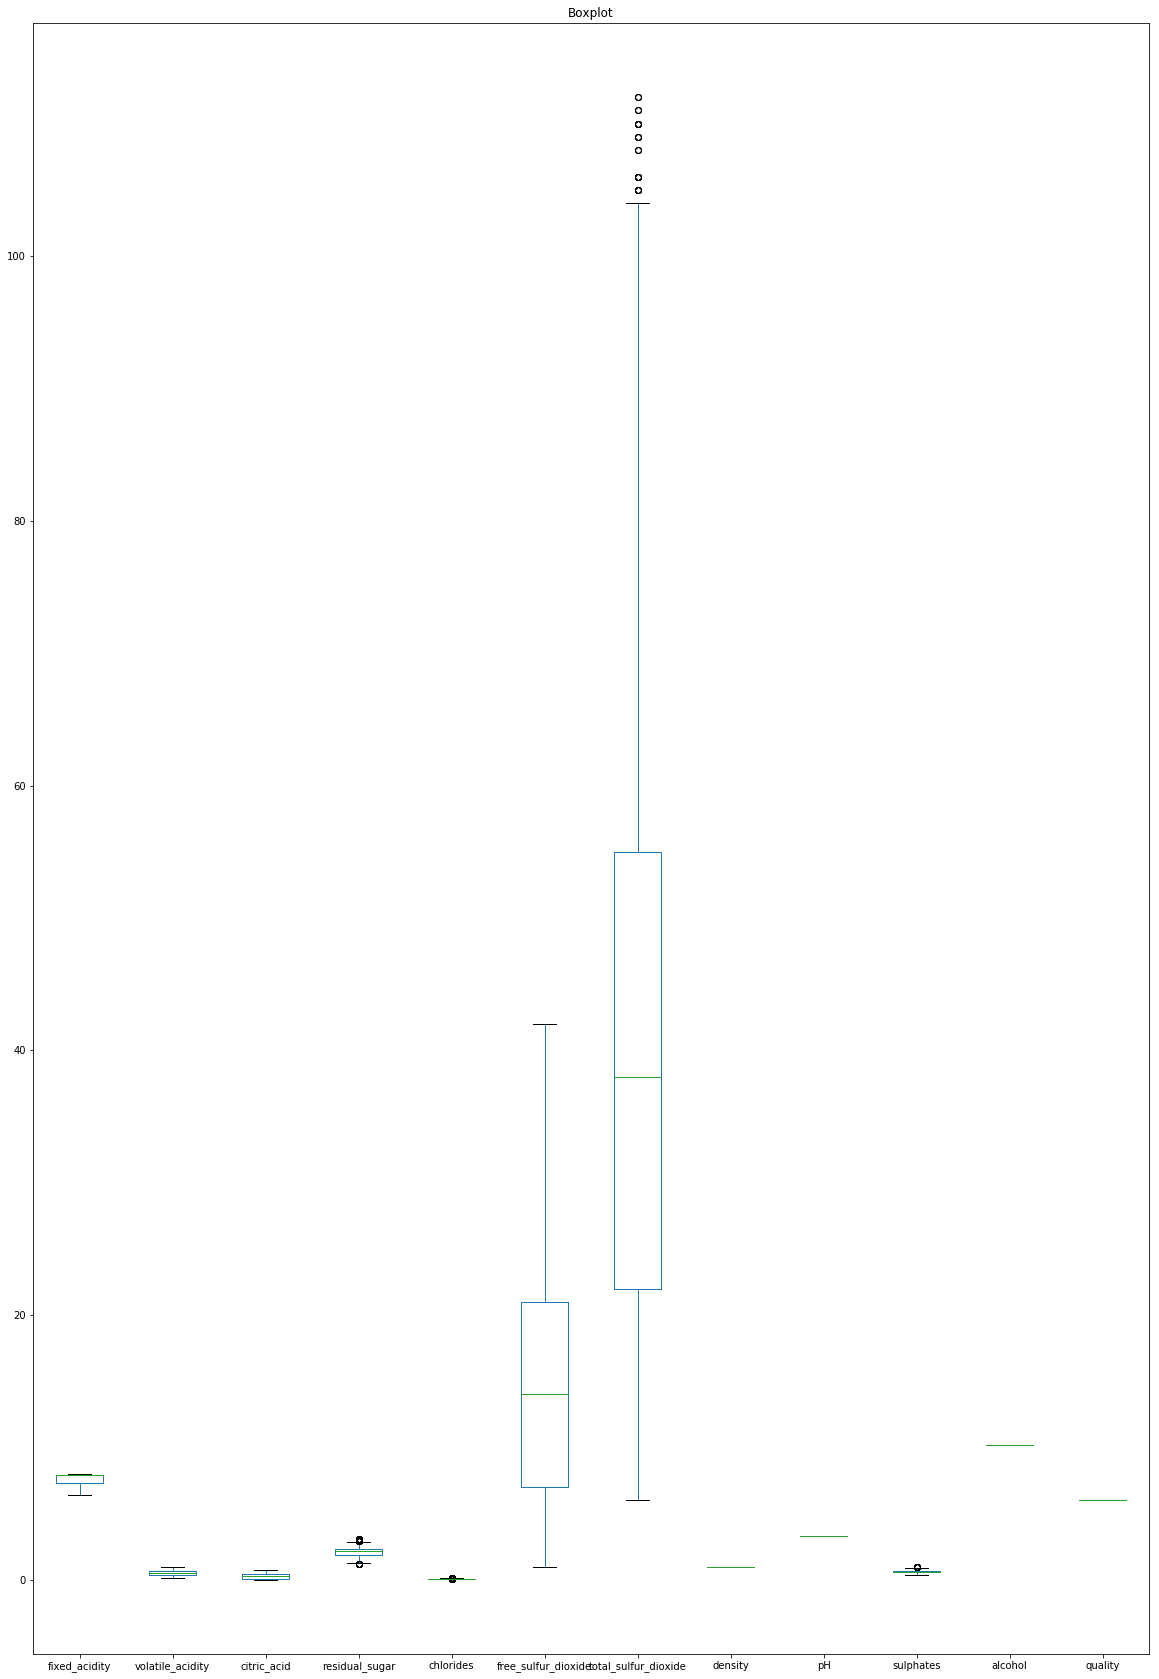

In [177]:
#After first level outlier treatment
wine.plot(kind = 'box', figsize = (20,30), title = 'Boxplot')

# After outlier treatment

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine rating'),
 Text(0.5,1,'Alcohol percent in different wine quality types')]

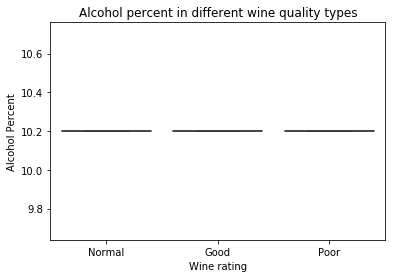

In [178]:
bx = sns.boxplot(x="rating", y='alcohol', data = wine)
bx.set(xlabel='Wine rating', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Sulphates in different types of Wine Quality')]

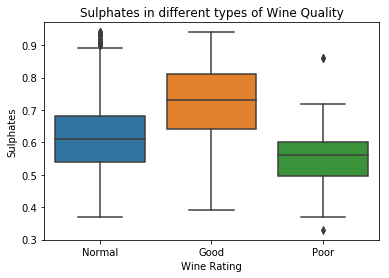

In [179]:
bx = sns.boxplot(x="rating", y='sulphates', data = wine)
bx.set(xlabel='Wine Rating', ylabel='Sulphates', title='Sulphates in different types of Wine Quality')

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Citric acid in different types of Wine Quality')]

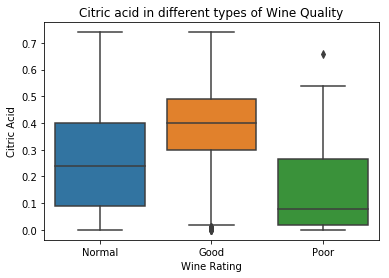

In [180]:
bx = sns.boxplot(x="rating", y='citric_acid', data = wine)
bx.set(xlabel='Wine Rating', ylabel='Citric Acid', title='Citric acid in different types of Wine Quality')

[Text(0,0.5,'Residual Sugar'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Residual Sugar in different types of Wine Quality')]

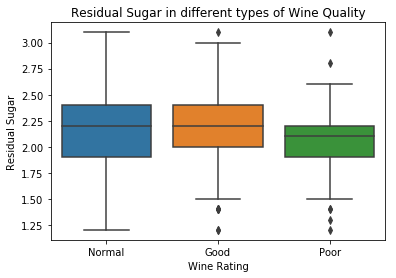

In [183]:
bx = sns.boxplot(x="rating", y='residual_sugar', data = wine)
bx.set(xlabel='Wine Rating', ylabel='Residual Sugar', title='Residual Sugar in different types of Wine Quality')

[Text(0,0.5,'density'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Density in different types of Wine Quality')]

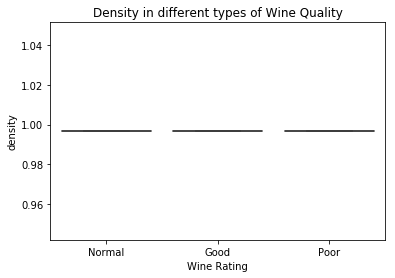

In [184]:
bx = sns.boxplot(x="rating", y='density', data = wine)
bx.set(xlabel='Wine Rating', ylabel='density', title='Density in different types of Wine Quality')

[Text(0,0.5,'volatile acidity'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Volatile Acidity in different types of Wine Quality')]

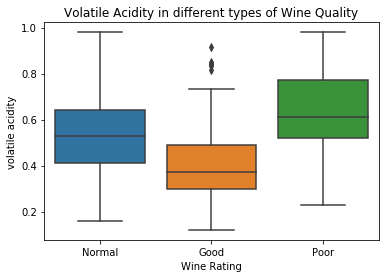

In [186]:
bx = sns.boxplot(x="rating", y='volatile_acidity', data = wine)
bx.set(xlabel='Wine Rating', ylabel='volatile acidity', title='Volatile Acidity in different types of Wine Quality')

[Text(0,0.5,'Chlorides'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Chlorides in different types of Wine Quality')]

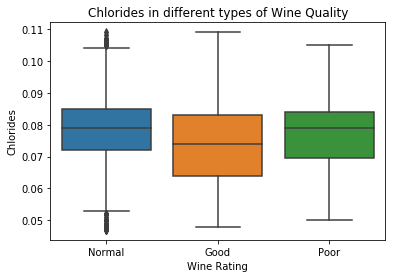

In [187]:
bx = sns.boxplot(x="rating", y='chlorides', data = wine)
bx.set(xlabel='Wine Rating', ylabel='Chlorides', title='Chlorides in different types of Wine Quality')

[Text(0,0.5,'Free Sulfur Dioxide'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'Free Sulfur Dioxide in different types of Wine Quality')]

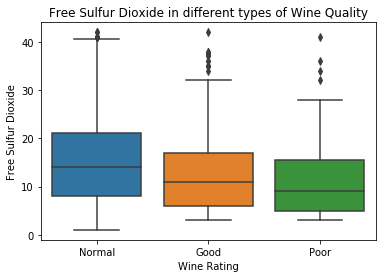

In [188]:
bx = sns.boxplot(x="rating", y='free_sulfur_dioxide', data = wine)
bx.set(xlabel='Wine Rating', ylabel='Free Sulfur Dioxide', title='Free Sulfur Dioxide in different types of Wine Quality')

[Text(0,0.5,'PH'),
 Text(0.5,0,'Wine Rating'),
 Text(0.5,1,'PH in different types of Wine Quality')]

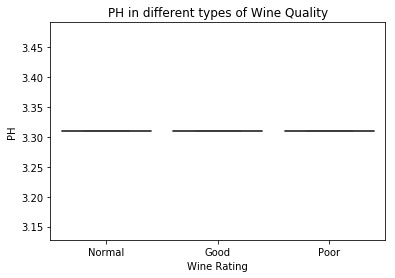

In [190]:
bx = sns.boxplot(x="rating", y='pH', data = wine)
bx.set(xlabel='Wine Rating', ylabel='PH', title='PH in different types of Wine Quality')

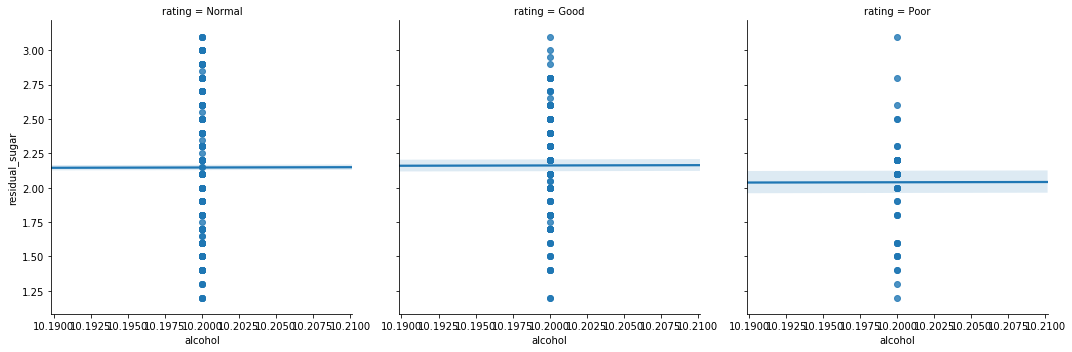

In [191]:
#Comparing alcohol and residual sugar with rating
sns.lmplot(x = "alcohol", y = "residual_sugar", col = "rating", data = wine)

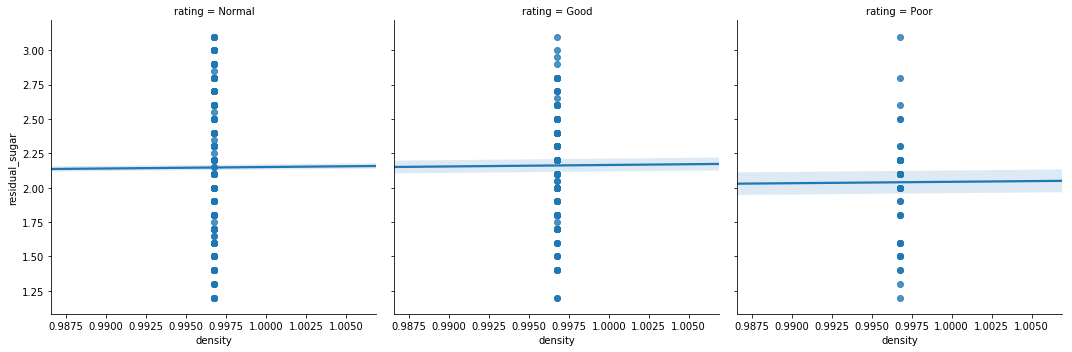

In [192]:
#Comparing density and residual sugar with rating
sns.lmplot(x = "density", y = "residual_sugar", col = "rating", data = wine)

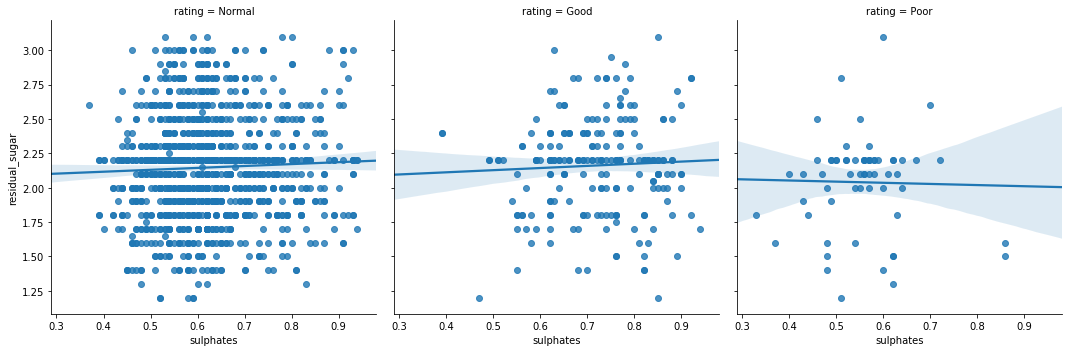

In [195]:
#Comparing sulphates and residual sugar with rating
sns.lmplot(x = "sulphates", y = "residual_sugar", col = "rating", data = wine)

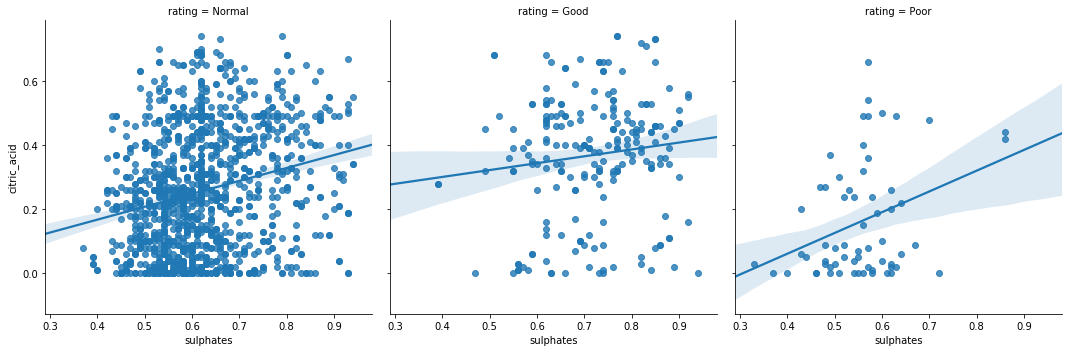

In [196]:
#Comparing sulphates and residual sugar with rating
sns.lmplot(x = "sulphates", y = "citric_acid", col = "rating", data = wine)

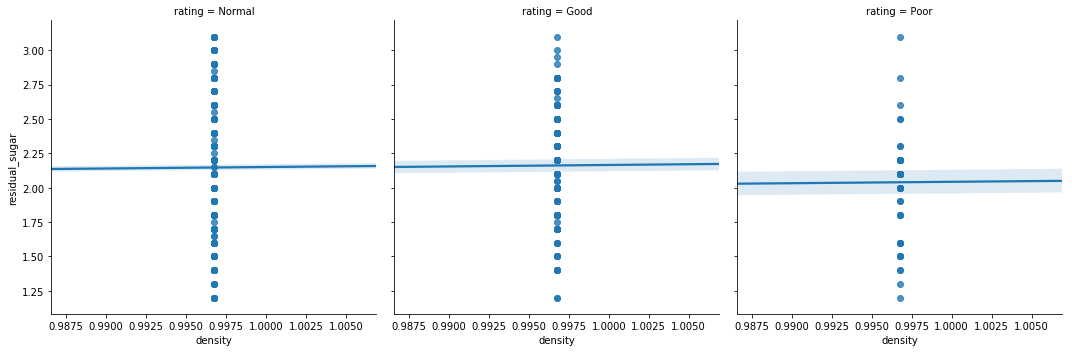

In [197]:
#Comparing density and residual sugar with rating
sns.lmplot(x = "density", y = "residual_sugar", col = "rating", data = wine)

#Observations:
Features affecting wine negatively:
1. Decrease in sulphates,residual sugar and citric acid will reduce the wine quality.
2. Increase in chlorides and volatile acidity will aslo reduce the wine quality.

Almost no effect on wine quality:
1. Alocohol, density and pH do not effect the quality of wine.

# Thank You